Principal Component Analysis of Geomechanical Properties of Rock

Dataset courtesy of https://www.kaggle.com/datasets/minhazengg/geomechanical-properties-of-rock/data

PCA Example Follow-Along from https://datagy.io/python-pca/

In [202]:
import pandas as pd
rock_df = pd.read_csv("https://raw.githubusercontent.com/A-Bin1/Statistical-Samples/main/Geomechanical_Properties_of_Rock.csv")

In [203]:
rock_df.shape

#1904 samples with 9 features

(1904, 9)

In [204]:
rock_df.head()

,Unnamed: 0,Depth,Resistivity,Gamma Ray,Total Porosity,Effective Porosity,Bulk Density,Compression Wave Travel Time,Shear Wave Travel Time
0,0,6805.0,57.47087,110.47838,0.03449,0.00445,2.76576,67.67523,124.05187
1,1,6805.5,58.85637,112.94601,0.03716,0.00775,2.76560,67.74464,123.80700
2,2,6806.0,65.01717,114.49005,0.03828,0.00976,2.75550,67.75224,123.40514
3,3,6806.5,63.35363,116.06593,0.03364,0.00568,2.74892,67.71935,123.23686
4,4,6807.0,62.28267,117.68179,0.03199,0.00340,2.75687,67.69218,123.43977


In [104]:
rock_df['Rock_ID'] = rock_df['Unnamed: 0'].astype(str) + 'r'

In [105]:
rock_df.head()

,Unnamed: 0,Depth,Resistivity,Gamma Ray,Total Porosity,Effective Porosity,Bulk Density,Compression Wave Travel Time,Shear Wave Travel Time,Rock_ID
0,0,6805.0,57.47087,110.47838,0.03449,0.00445,2.76576,67.67523,124.05187,0r
1,1,6805.5,58.85637,112.94601,0.03716,0.00775,2.76560,67.74464,123.80700,1r
2,2,6806.0,65.01717,114.49005,0.03828,0.00976,2.75550,67.75224,123.40514,2r
3,3,6806.5,63.35363,116.06593,0.03364,0.00568,2.74892,67.71935,123.23686,3r
4,4,6807.0,62.28267,117.68179,0.03199,0.00340,2.75687,67.69218,123.43977,4r


In [106]:
rock_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [111]:
rock_dfi = rock_df.set_index('Rock_ID')

In [112]:
print(rock_dfi.describe())

             Depth  Resistivity    Gamma Ray  Total Porosity   
count  1904.000000  1904.000000  1904.000000     1904.000000  \
mean   7280.750000   146.141582   116.270437        0.059863   
std     274.890887   322.464089    61.220418        0.023739   
min    6805.000000    17.413170    24.463470        0.002870   
25%    7042.875000    62.688825    84.264097        0.042928   
50%    7280.750000    85.495010   117.570395        0.055185   
75%    7518.625000   121.405745   130.947012        0.074783   
max    7756.500000  7223.240720   623.150210        0.142080   

       Effective Porosity  Bulk Density  Compression Wave Travel Time   
count         1904.000000   1904.000000                   1904.000000  \
mean             0.038633      2.652268                     73.176217   
std              0.023542      0.072419                     10.732976   
min              0.002120      2.428950                     50.805650   
25%              0.019688      2.601138                   

In [113]:
rock_dfi.head()

,Depth,Resistivity,Gamma Ray,Total Porosity,Effective Porosity,Bulk Density,Compression Wave Travel Time,Shear Wave Travel Time
Rock_ID,,,,,,,,
0r,6805.0,57.47087,110.47838,0.03449,0.00445,2.76576,67.67523,124.05187
1r,6805.5,58.85637,112.94601,0.03716,0.00775,2.76560,67.74464,123.80700
2r,6806.0,65.01717,114.49005,0.03828,0.00976,2.75550,67.75224,123.40514
3r,6806.5,63.35363,116.06593,0.03364,0.00568,2.74892,67.71935,123.23686
4r,6807.0,62.28267,117.68179,0.03199,0.00340,2.75687,67.69218,123.43977


In [114]:
# Scaling Our Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rock_dfi)

print(scaled_data[0])

[-1.73114136 -0.2750508  -0.09463474 -1.06910106 -1.45240709  1.56756618
 -0.51266604  0.00635606]


In [115]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

In [116]:
print(pca.explained_variance_ratio_)

[0.48591306 0.28046891 0.13252787 0.05301049 0.03032274 0.01176772
 0.00407937 0.00190984]


In [117]:
# Exploring PCA Data
expl_var = pca.explained_variance_ratio_
df_expl_var = pd.DataFrame(
    data=zip(range(1, len(expl_var) + 1), expl_var, expl_var.cumsum()), 
    columns=['PCA', 'Explained Variance (%)', 'Total Explained Variance (%)']
    ).set_index('PCA').mul(100).round(1)
print(df_expl_var)

     Explained Variance (%)  Total Explained Variance (%)
PCA                                                      
1                      48.6                          48.6
2                      28.0                          76.6
3                      13.3                          89.9
4                       5.3                          95.2
5                       3.0                          98.2
6                       1.2                          99.4
7                       0.4                          99.8
8                       0.2                         100.0


76% of explained variance among 2 variables.

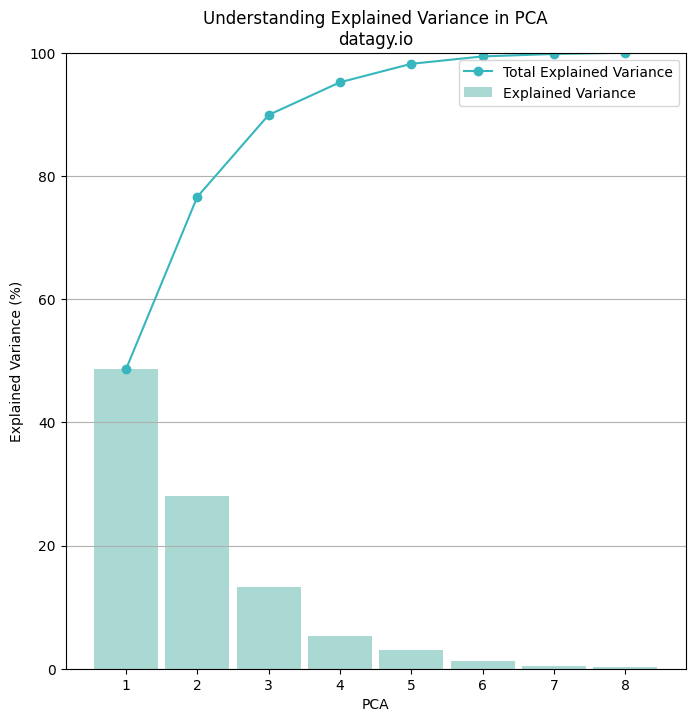

In [118]:
# Plotting our explained variance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.bar(x=df_expl_var.index, height=df_expl_var['Explained Variance (%)'], label='Explained Variance', width=0.9, color='#AAD8D3')
ax.plot(df_expl_var['Total Explained Variance (%)'], label='Total Explained Variance', marker='o', c='#37B6BD')

plt.ylim(0, 100)
plt.ylabel('Explained Variance (%)')
plt.xlabel('PCA')
plt.grid(True, axis='y')
plt.title('Understanding Explained Variance in PCA\ndatagy.io')
plt.legend()

In [119]:
# Fitting and Transforming Our Data Using PCA - Reduce to 2 dimensions
pca = PCA(2)
X_r = pca.fit_transform(scaled_data)

In [120]:
print(X_r[:2])

[[-1.96984975 -2.21858031]
 [-1.84510566 -2.16326737]]


In [121]:
#loading scores
print(pca.components_)

[[ 0.04347442  0.06005206  0.3894237   0.46464588  0.41138884 -0.33158569
   0.44788869  0.38361829]
 [ 0.58720639  0.09951463 -0.24074602  0.10396103  0.33752687 -0.46786457
  -0.2729651  -0.41132391]]


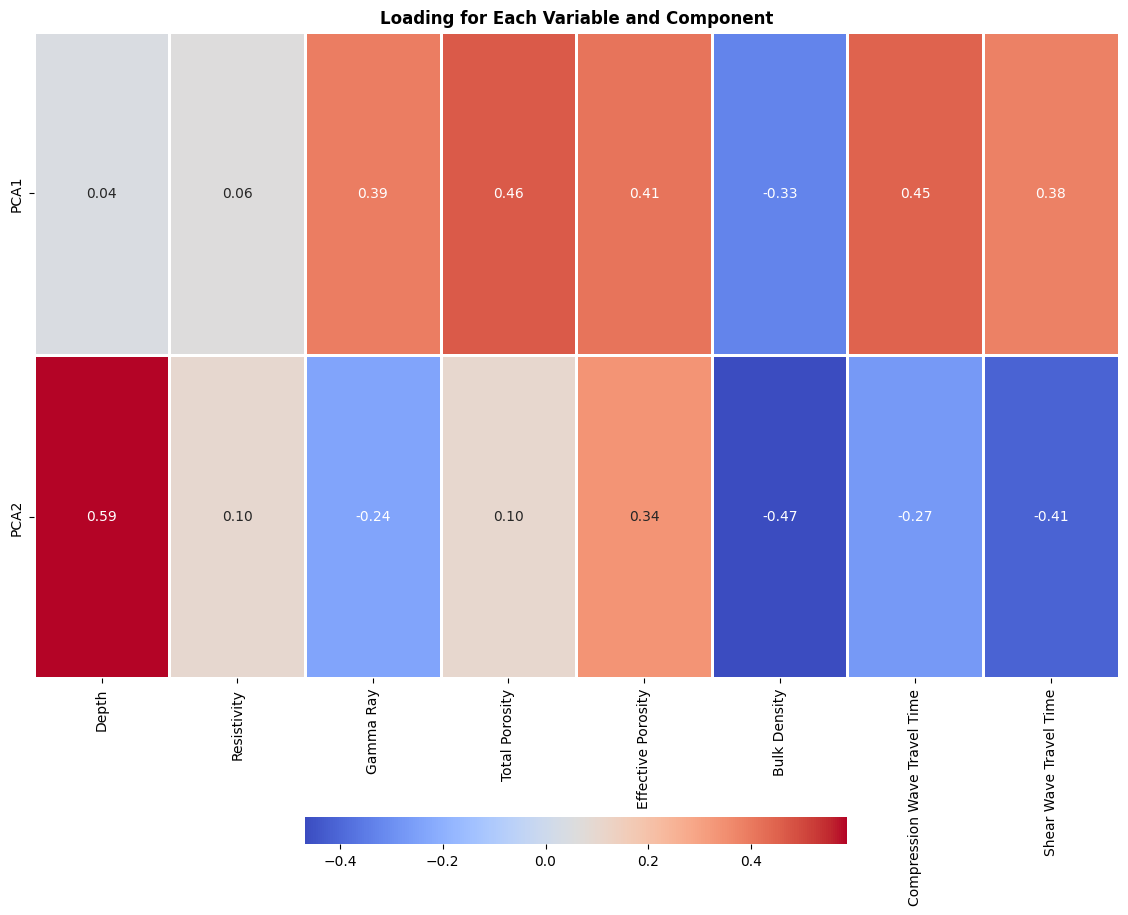

In [136]:
# Plotting a Heatmap of Our Loadings
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,12))

ax = sns.heatmap(
    pca.components_,
    cmap='coolwarm',
    yticklabels=[f'PCA{x}' for x in range(1,pca.n_components_+1)],
    xticklabels=list(rock_dfi.columns),
    linewidths=1,
    annot=True,
    fmt=',.2f',
    cbar_kws={"shrink": 0.5, "orientation": 'horizontal'}
    )

ax.set_aspect("auto")
plt.title('Loading for Each Variable and Component', weight='bold')
plt.show()

In [183]:
loadings = pd.DataFrame(pca.components_)

In [184]:
feature = pd.DataFrame(list(rock_dfi.columns))

In [185]:
loadings.head()

,0,1,2,3,4,5,6,7
0,0.043474,0.060052,0.389424,0.464646,0.411389,-0.331586,0.447889,0.383618
1,0.587206,0.099515,-0.240746,0.103961,0.337527,-0.467865,-0.272965,-0.411324


In [186]:
loadingsdf = loadings.T
loadingsdf.columns = ['PC1','PC2']

In [188]:
loadingsdf['Feature'] = feature

In [192]:
loadingsdf

,PC1,PC2,Feature
0,0.043474,0.587206,Depth
1,0.060052,0.099515,Resistivity
2,0.389424,-0.240746,Gamma Ray
3,0.464646,0.103961,Total Porosity
4,0.411389,0.337527,Effective Porosity
5,-0.331586,-0.467865,Bulk Density
6,0.447889,-0.272965,Compression Wave Travel Time
7,0.383618,-0.411324,Shear Wave Travel Time


In [193]:
ldf = loadingsdf.set_index('Feature')

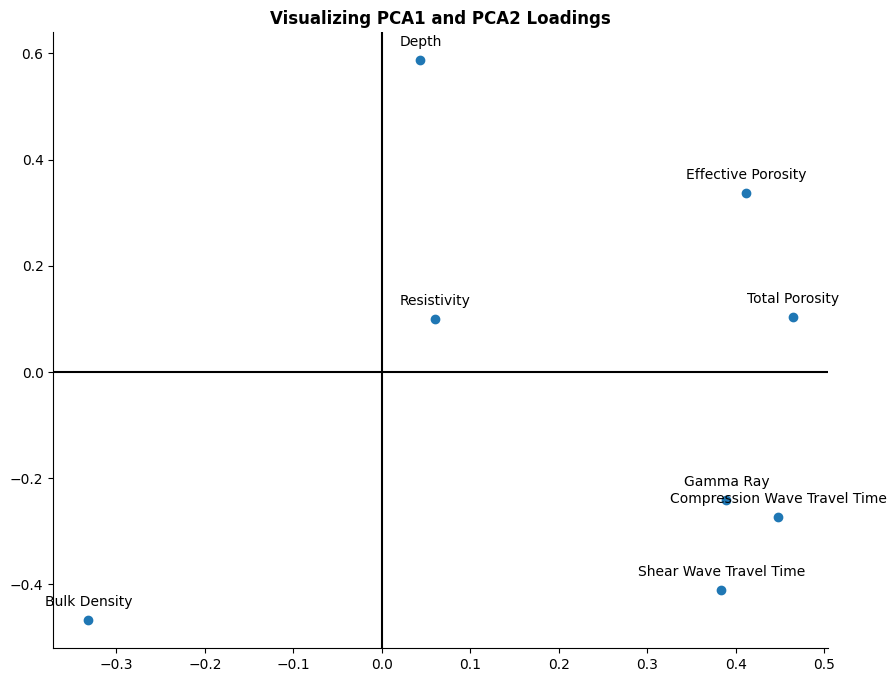

In [201]:
# Visualizing Loading in a Scatterplot
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(
    x=ldf['PC1'],
    y=ldf['PC2'],
)

plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")

for label, x_val, y_val in zip(ldf.index, ldf['PC1'], ldf['PC2']):
    plt.annotate(label, (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Visualizing PCA1 and PCA2 Loadings', weight='bold')
ax.spines[['right', 'top', ]].set_visible(False)
plt.show()